# Fitting a Model to your Data

## Step 1: Plot your Data

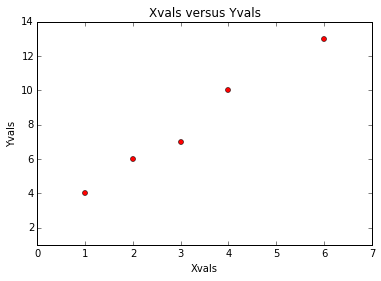

In [45]:
# Libraries you'll need
%matplotlib inline
import matplotlib.pyplot as plt

# Our Data
xvals=[1,2,3,4,6]
yvals=[4,6,7,10,13]

# Plot the data as red circles
# Note: 'ro' = red circles and markersize is the size of the circles
plt.plot(xvals, yvals, 'ro', markersize=5)

# Set the axes ranges to be xrange = 0 to 7 and yrange = 1 to 14
plt.axis([0, 7, 1, 14])

# Label the plot
plt.title('Xvals versus Yvals')
plt.xlabel('Xvals')
plt.ylabel('Yvals')

## Step 2: Plot your Data and the Uncertainty on your Data

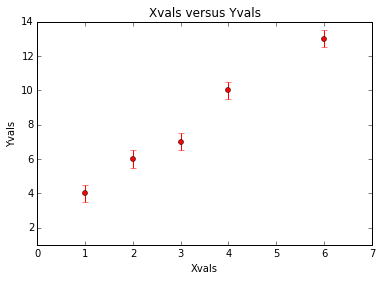

In [54]:
# Libraries you'll need
import numpy as np

# Uncertainty on your y-values 
errorVal = 0.5

# Plot the data as red circles with vertical errorbars
plt.errorbar(xvals, yvals, yerr = errorVal, fmt='ro', markersize=5)

# Set the axes ranges to be xrange = 0 to 7 and yrange = 1 to 14
plt.axis([0, 7, 1, 14])

# Label the plot
plt.title('Xvals versus Yvals')
plt.xlabel('Xvals')
plt.ylabel('Yvals')

## Step 3: Define the Function you'll use to Fit to your Data

Set up the function that you'll fit to your data. The choice of function takes some initial guessing on your part. Is it linear, exponential, sinusoidal, etc.? 

Here it's pretty clear we should fit the data with a linear function (y = ax + b)

In [47]:
# Define the function you'll use to fit to your data
# In this case it's a linear fit, so we'll use y = a x + b
def fitFunc(x, a, b):
    return a*x + b

## Step 4: Find the Best-Fit Parameters for your Model fit to your Data

To find the best-fit parameters, you'll use a Python function called 'curve_fit'. 

You input into curve_fit:
* Your data (i.e., xvals versus yvals)
* Your model for your data (i.e., the model you defined using fitFunc; y = a x + b)

Curve_fit then outputs:
* the best values for 'a' and 'b' that make the best match between your data (xvals & yvals) and the fitFunc model.

In [48]:
# Libraries you'll need
from scipy.optimize import curve_fit

In [49]:
# Find the best-fit parameters fitting the function to your data

# In the step above you defined fitFunc to be y = a x + b

# Here, curve_fit is a function that helps you find the best values 
# for 'a' and 'b' that make the best match between 
# your data (xvals & yvals) and the fitFunc model.

fitCoeffs, fitCovariances = curve_fit(fitFunc, xvals, yvals)

# Pick out the best-fit for the 'a' value and best-fit for the 'b' value
bestfit_a = fitCoeffs[0]
bestfit_b = fitCoeffs[1]

print 'best-fit value for \'a\': ', bestfit_a
print 'best-fit value for \'b\': ', bestfit_b

best-fit value for 'a':  1.82432432499
best-fit value for 'b':  2.16216215899


Note: You may have noticed in the code above 'fitCovariances'. This is the covariance matrix that curve_fit creates. We'll use it in determining the uncertainty on our best fit in Step 6.  

## Step 5: Overplot the Best-Fit Curve on your Data

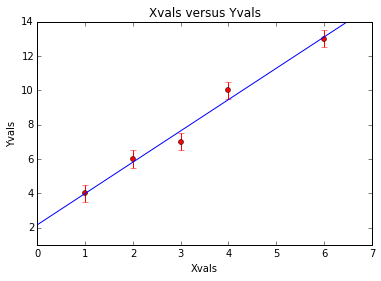

In [50]:
# Plot your data as red circles with error bars
plt.errorbar(xvals, yvals, yerr = errorVal, fmt='ro', markersize=5)
plt.axis([0, 7, 1, 14])
plt.title('Xvals versus Yvals')
plt.xlabel('Xvals')
plt.ylabel('Yvals')

# Define the best-fit line x-values
bestfit_xvals = np.linspace(0,14,50) #an array from 0-13, with 50 linearly spaced points

# Define the y-values for the best-fit line, using the fitFunc function you defined above
bestfit_yvals = fitFunc(bestfit_xvals, bestfit_a, bestfit_b)

# Overplot the best-fit line in blue (default color)
plt.plot(bestfit_xvals, bestfit_yvals)

## Step 6: Determine the Uncertainty in the Model Fit

curve_fit not only gives you the best-fit values for your model parameters ('a' and 'b'), but also <a href="http://en.wikipedia.org/wiki/Covariance_matrix">'fitCovariances'</a> which tells you what the uncertainty is on those values. 

In other words, 'fitCovariances' quantifies how well you trust your model's fit to the data. 

In [51]:
# First see what fitCovariances looks like
print ' Covariance matrix:\n', fitCovariances

 Covariance matrix:
[[ 0.01673971 -0.05356708]
 [-0.05356708  0.22096421]]


What do these numbers mean? The upper-left value (0.0167) and the lower-right value (0.22096) will help give you a sense for the uncertainty on how well your model fits the data.

<a href="http://en.wikipedia.org/wiki/Standard_deviation">Sigma or standard deviation</a> are the names we give this 'sense for the uncertainty'. It's a way of quantifying how much we trust our answer.

In [52]:
# Determine the sigma values for 'a' and 'b'
# Note: np.sqrt = taking the square-root of the value

# sigma_a = the square-root of the upper-left value in the covariance matrix
# sigma_b = the square-root of the lower-right value in the covariance matrix
sigma_a = np.sqrt(fitCovariances[0,0])
sigma_b = np.sqrt(fitCovariances[1,1])

print '\'a\' +/- sigma_a: ', bestfit_a,' +/- ',sigma_a
print '\'b\' +/- sigma_b: ', bestfit_b,' +/- ',sigma_b

'a' +/- sigma_a:  1.82432432499  +/-  0.129382042257
'b' +/- sigma_b:  2.16216215899  +/-  0.470068300127


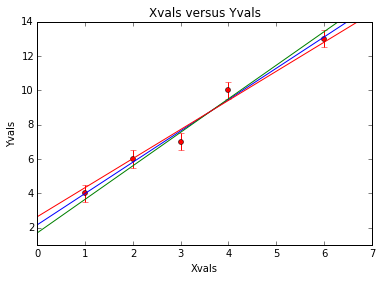

In [53]:
# Plot your data, the best-fit, and the uncertainty on this best-fit

# Plot your data as red circles with error bars
plt.errorbar(xvals, yvals, yerr = errorVal, fmt='ro', markersize=5)
plt.axis([0, 7, 1, 14])
plt.title('Xvals versus Yvals')
plt.xlabel('Xvals')
plt.ylabel('Yvals')

# Overplot the best-fit line in blue (default color)
plt.plot(bestfit_xvals, bestfit_yvals)

# Define the y-values for the upper best-fit line
upper_yvals = fitFunc(bestfit_xvals, bestfit_a + sigma_a, bestfit_b - sigma_b)

# Define the y-values for the lower best-fit line
lower_yvals = fitFunc(bestfit_xvals, bestfit_a - sigma_a, bestfit_b + sigma_b)

# Overplot the upper and lower best-fit lines
#(green is the default color for 1st overplot, red is default color for 2nd)
plt.plot(bestfit_xvals, upper_yvals)
plt.plot(bestfit_xvals, lower_yvals)

### The green and the red lines (showing the sigma) give a sense for how uncertain your best-fit is to your data. In this case, you can see that the fit is pretty good.

For additional information and examples of fitting using different functions, check out this <a href="http://nbviewer.ipython.org/url/media.usm.maine.edu/~pauln/ScipyScriptRepo/CurveFitting.ipynb">tutorial</a> and then this <a href="http://www.walkingrandomly.com/images/python/least_squares/Python_nonlinear_least_squares.pdf">tutorial</a>.